# What is gradient descent?

Here’s what Wikipedia says: “Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function.”

To understand gradient descent algorithm, let us first understand a real life machine learning problem: 
Suppose you have a dataset where you are provided with the number of hours a student studies per day and the percentage of marks scored by the corresponding student. If you plot a 2D graph of this dataset, it will look something like this:

<img src="images/1.png">

Now, if someone approaches you and says that a new student has taken admission and you need to predict the score of that student based on the number of hours he studies. How would you do that? 
To predict the score of the new student, at first you need to find out a relationship between “Hours studied” and “Score” from the existing dataset. By taking a look over the visual graph plotting, we can see that a linear relationship can be established between these two things. So, by drawing a straight line over the data points in the graph, we can establish the relationship. Let’s see how would it look if we try to draw a straight line over the data points. It would look something like this:

<img src="images/2.png">

Great! Now we have the relationship between “Hours Studied” and “Score”. So, now if someone asks us to predict the score of a student who studies 10 hours per day, we can just simply put Hours Studied = 10 data point over the relationship line and predict the value of his score like this:

<img src="images/3.png">

From the above picture, we can easily say that the new student who studies 10 hours per day would probably score around 60. Pretty easy, right? By the way, the relationship line that we have drawn is called the “regression” line. And because the relationship we have established is a linear relationship, the line is actually called “linear regression” line. Hence, this machine learning model that we have created is known as linear regression model.

At this point, you might have noticed that all the data points do not lie perfectly over the regression line. So, there might be some difference between the predicted value and the actual value. We call this difference as error(or cost).

<img src="images/4.png">

In machine learning world, we always try to build a model with as minimum error as possible. To achieve this, we have to calculate the error of our model in order to best fit the regression line over it. We have different kinds of error like- total error, mean error, mean squared error etc.

Total error: Summation of the absolute difference between predicted and actual value for all the data points. Mathematically, this is

<img src="images/5.png">

Mean error: Total error / number of data points. Mathematically, this is

<img src="images/6.png">

Mean squared error: Summation of the square of absolute difference / number of data points. Mathematically, this is

<img src="images/7.png">

Below is an example of calculating these errors:

<img src="images/8.png">

We will use the Mean Squared Error(M.S.E) to calculate the error and determine the best linear regression line(the line with the minimum error value) for our model.

Now the question is, how would you represent a regression line in a computer?

The answer is simple. Remember the equation of a straight line? We can use the same equation in order to represent the regression line in computer. If you can’t recall it, let me quickly remind you, it’s **y = M * x + B**

<img src="images/9.png">

Here, M is the slope of the line and B is the Y intercept. Let’s quickly recall about slope and Y intercept. 
Slope is the amount by which the line is rising on the Y axis for every block that you go towards right in the X axis. This tells us the direction of the line and the rate by which our line is increasing. <img src="images/10.png"> 

From the dotted lines in the above picture, we can see that for every 2 blocks in the X axis, the line rises by 1 block in the Y axis.<br>
Hence, slope, M = ½ = 0.5<br>
And it’s a positive value, which indicates that the line is increasing in the upward direction.

Now, let’s come to Y intercept. It is the distance which tells us exactly where the line cuts the Y axis. From the above picture, we can see that the line is cutting Y axis on point (0,1). So, the Y intercept(B) in this case is the distance between (0,0) and (0,1) = 1.

Hence, the straight line on the above picture can be represented through the following equation:

y = 0.5 * x + 1

Now we know how to represent the regression line in a computer. Everything seems good so far. But, the biggest question still remains unanswered- “How would the computer know the right value of M and B for drawing the regression line with the minimum error?”

Exactly that’s why we need the gradient descent algorithm. Gradient descent is a trial and error method, which will iteratively give us different values of M and B to try. In each iteration, we will draw a regression line using these values of M and B and will calculate the error for this model. We will continue until we get the values of M and B such that the error is minimum.

Let’s have a more elaborative view of gradient descent algorithm:

<img src="images/11.png">
<img src="images/12.png">
<img src="images/13.png">

By the way, the application of gradient descent is not limited to regression problems only. It is an optimization algorithm which can be applied to any problem in general.

# The math behind gradient descent

Till now we have understood that we will use gradient descent to minimize the error for our model. But, now let us see exactly how gradient descent finds the best values of M and B for us.

Gradient descent tries to minimize the error. Right?

So, we can say that it tries to minimize the following function(cost function):

<img src="images/14.png">

At first we will take random values of M and B. So, we will get a random error corresponding to these values. Thus, a random point will be plotted on the above graph. At this point, there will be some error. So, our objective will be to reduce this error.

In general, how would you approach towards the minimum value of a function? By finding its derivative. Right? The same thing applies here.

We will obtain the partial derivative of J with respect to M and B. This will give us the direction of the slope of tangent at the given point. We would like to move in the opposite direction of the slope in order to approach towards the minimum value.

<img src="images/15.png">

So far, we have only got the direction of the slope and we know we need to move in its opposite direction. But, in each iteration, by how much amount we should move in the opposite direction? This amount is called the learning rate(alpha). Learning rate determines the step size of our movement towards the minimal point.

So, choosing the right learning rate is very important. If the learning rate is too small, it will take more time to converge. On the other hand, if the learning rate is very high, it may overshoot the minimum point and diverge.

<img src="images/16.png">

To sum up, what we have till now is-

1. A random point is chosen initially by choosing random values of M and B.
2. Direction of the slope of that point is found by finding delta_m and delta_b
3. Since we want to move in the opposite direction of the slope, we will multiply -1 with both delta_m and delta_b.
4. Since delta_m and delta_b gives us only the direction, we need to multiply both of them with the learning rate(alpha) to specify the step size of each iteration.
5. Next, we need to modify the current values of M and B such that the error is reduced.
<img src="images/1.png">
6. We need to repeat steps 2 to 5 until we converge at the minimum point.

# Implementation of gradient descent using Python

This was everything about gradient descent algorithm. Now we will implement this algorithm using Python.

Let us first import all required libraries and read the dataset using Pandas library(the csv file can be downloaded from this [link](https://github.com/codeheroku/Introduction-to-Machine-Learning/tree/master/gradient%20descent/starter%20code)):


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("csv/student_scores.csv") #Read csv file using Pandas library

Next, we need to read the values of X and Y from the dataframe and create a scatter plot of that data.

Text(0, 0.5, 'Student Score')

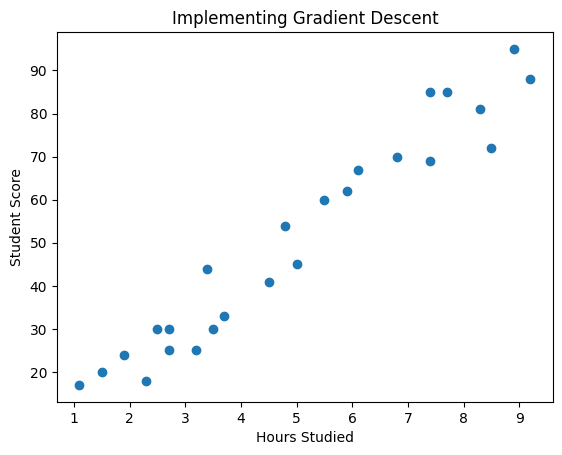

In [28]:
X = df["Hours"] #Read values of X from dataframe
Y = df["Scores"] #Read values of Y from dataframe

plt.plot(X,Y,'o') # 'o' for creating scatter plot
plt.title("Implementing Gradient Descent")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")

After that, we will initially choose m = 0 and b = 0

In [29]:
m = 0
b = 0

Now, we need to create a function(gradient descent function) which will take the current value of m and b and then give us better values of m and b.

In [30]:
def grad_desc(X,Y,m,b):
    for point in zip(X,Y):
        x = point[0] #value of x of a point
        y_actual = point[1] #Actual value of y for that point

        y_prediction = m*x + b #Predicted value of y for given x

        error = y_prediction - y_actual #Error in the estimation    
    
    #Using alpha = 0.0005
        delta_m = -1 * (error*x) * 0.0005 #Calculating delta m
        delta_b = -1 * (error) * 0.0005 #Calculating delta b

        m = m + delta_m #Modifying value of m for reducing error
        b = b + delta_b #Modifying value of b for reducing error

    return m,b #Returning better values of m and b

Notice, in the above code, we are using learning rate(alpha) = 0.0005 . You can try to modify this value and try this example with different learning rates.

Now we will make a function which will help us to plot the regression line on the graph.

In [31]:
def plot_regression_line(X,m,b):
    regression_x = X.values #list of values of x
    regression_y = [] #list of values of y
    for x in regression_x:
        y = m*x + b #calculating the y_prediction
        regression_y.append(y) #adding the predicted value in list of y

    plt.plot(regression_x,regression_y) #plot the regression line
    plt.pause(1) #pause for 1 second before plotting next line

Now, when we will run the grad_desc() function, each time we will get a better result for regression line. Let us create a loop and run the grad_desc() function for 10 times and visualize the results.

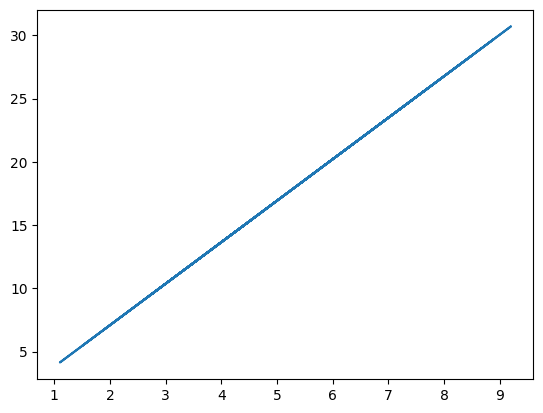

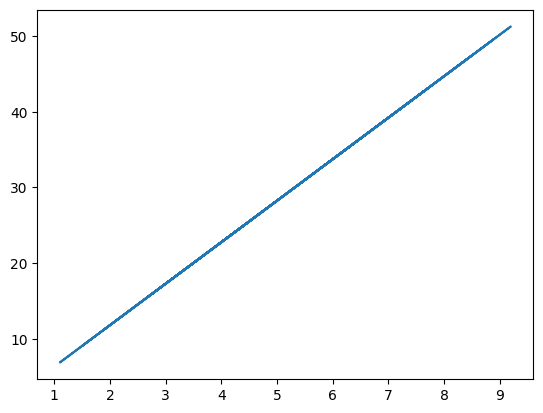

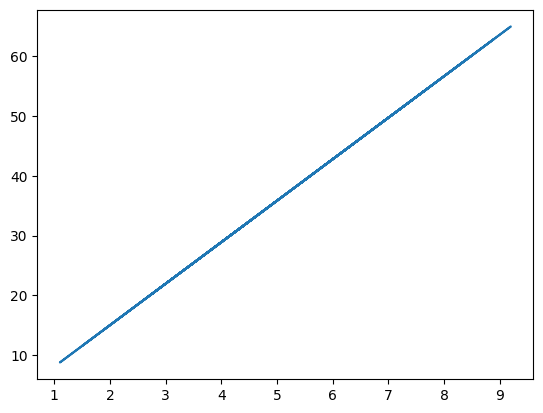

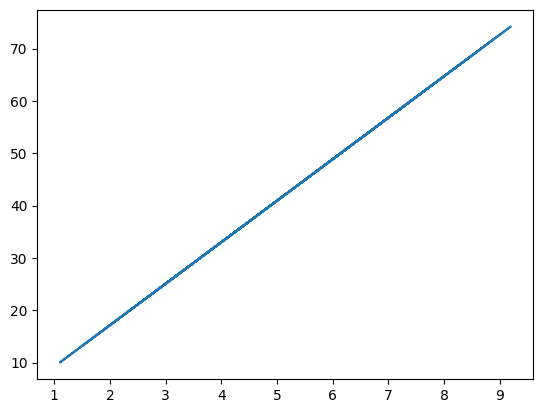

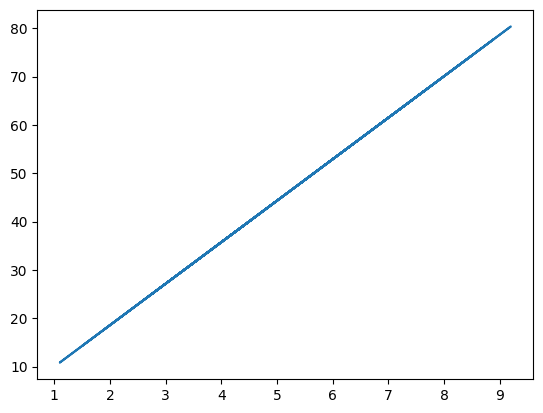

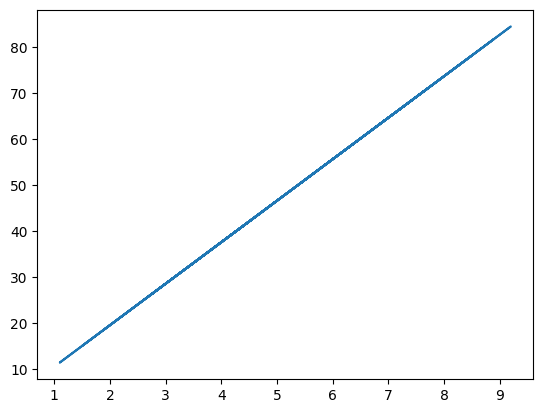

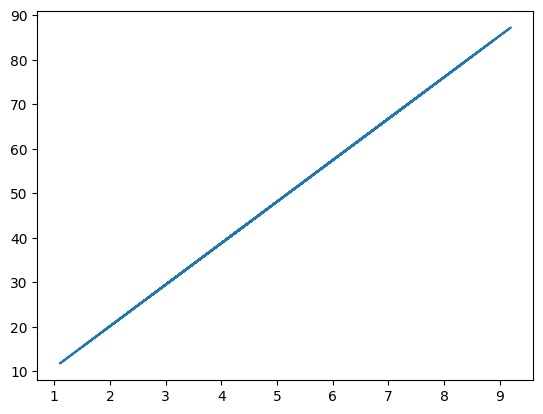

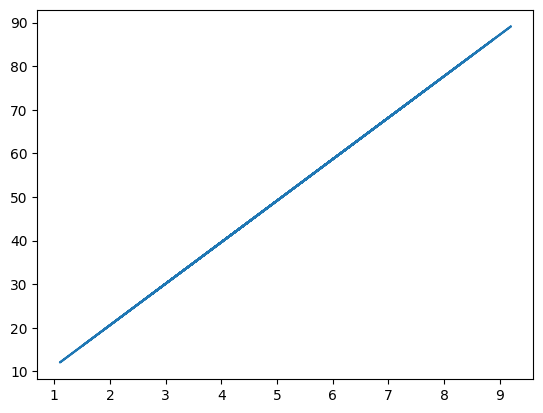

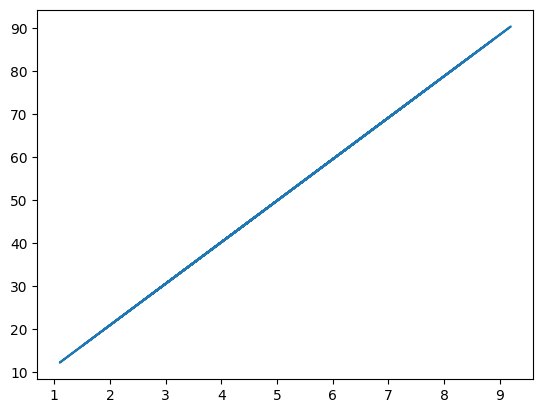

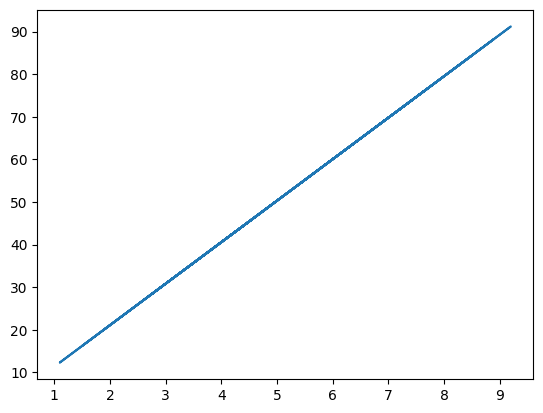

In [32]:
for i in range(0,10):
    m,b = grad_desc(X,Y,m,b) #call grad_desc() to get better m & b
    plot_regression_line(X,m,b) #plot regression line with m & b

Finally, we need to show the plot by adding the following statement:

In [33]:
plt.show()

So, the full code for our program is:

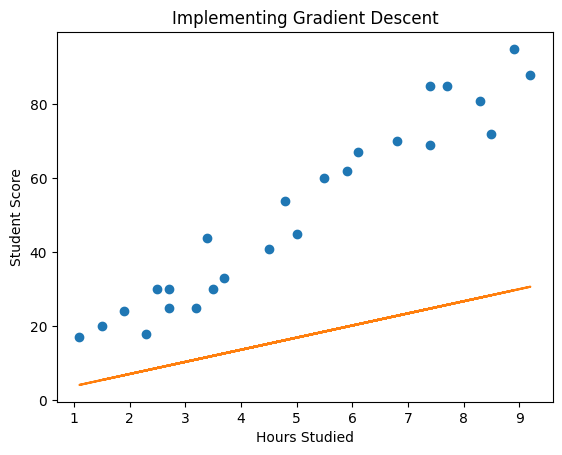

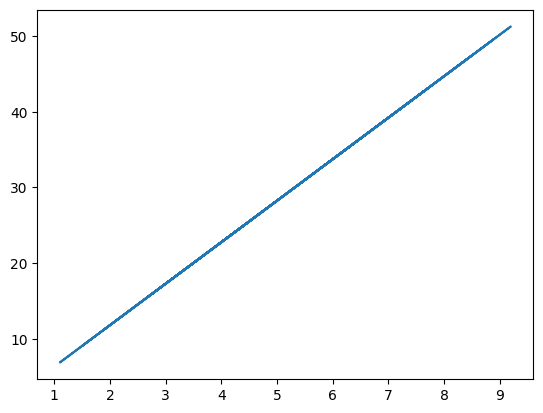

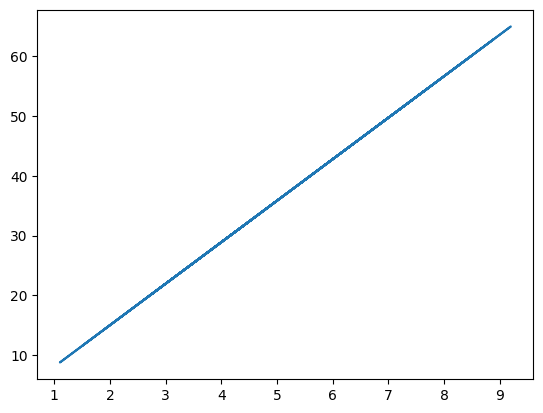

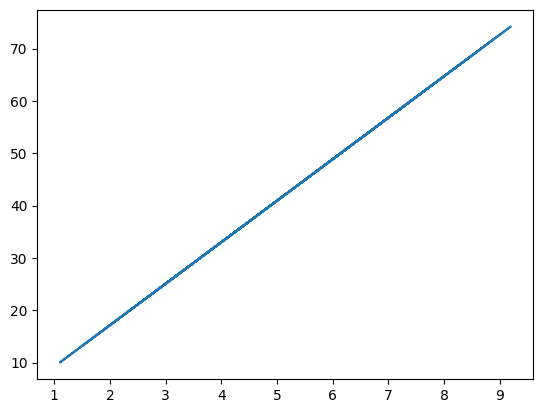

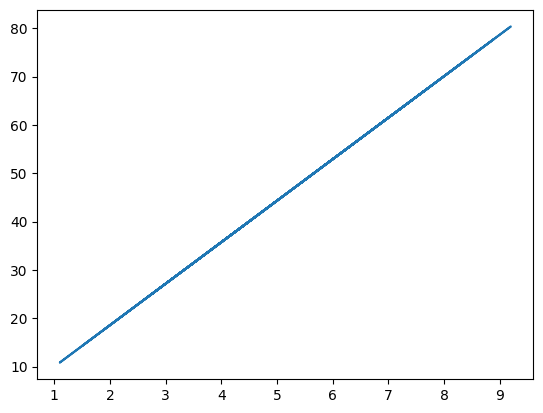

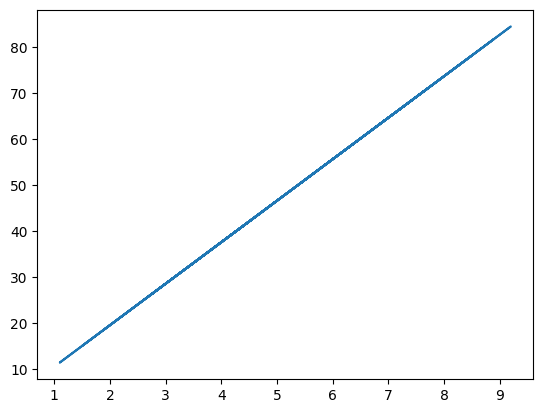

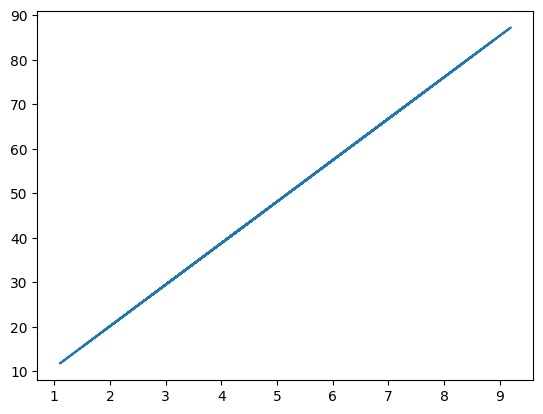

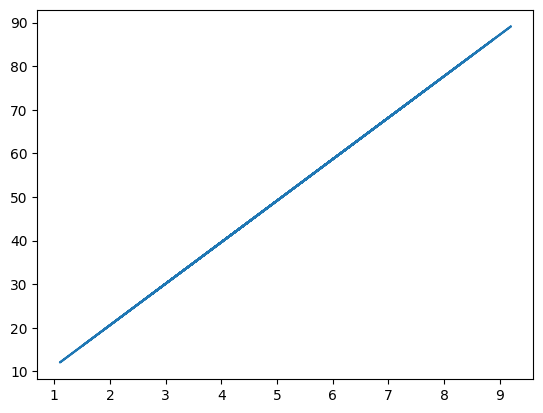

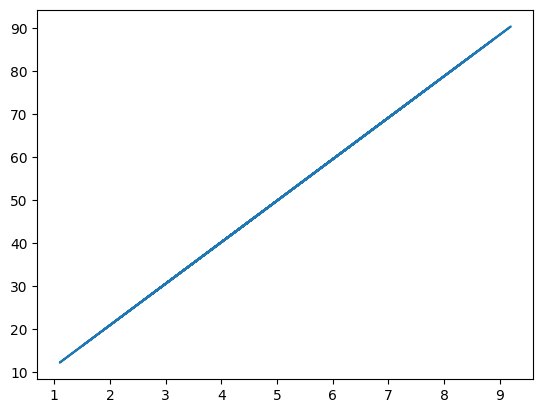

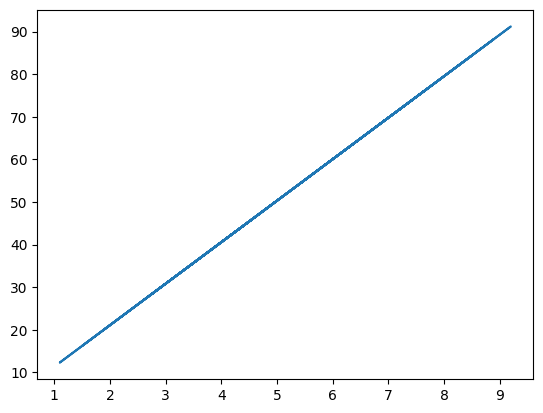

In [34]:
import pandas as pd
import matplotlib.pyplot as plt  

# function for plotting regression line
def plot_regression_line(X,m,b):
    regression_x = X.values
    regression_y = []
    for x in regression_x:
        y = m*x + b
        regression_y.append(y)

    plt.plot(regression_x,regression_y)
    plt.pause(1)


df = pd.read_csv("csv/student_scores.csv")

X = df["Hours"]
Y = df["Scores"]

plt.plot(X,Y,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("Hours Studied")
plt.ylabel("Student Score")

m = 0
b = 0

# gradient descent function
def grad_desc(X,Y,m,b):
    for point in zip(X,Y):
        x = point[0]
        y_actual = point[1]

        y_prediction = m*x + b

        error = y_prediction - y_actual

        delta_m = -1 * (error*x) * 0.0005
        delta_b = -1 * (error) * 0.0005

        m = m + delta_m
        b = b + delta_b
    return m,b	 


for i in range(0,10):
    m,b = grad_desc(X,Y,m,b)
    plot_regression_line(X,m,b)

plt.show()

Now let’s run the above program for different values of learning rate(alpha).

For alpha = 0.0005 , the output will look like this:

<img src="images/18.gif">

For alpha = 0.05 , it will look like this:

<img src="images/19.gif">

For alpha = 1, it will overshoot the minimum point and diverge like this:

<img src="images/20.gif">

The gradient descent algorithm about which we discussed in this article is called stochastic gradient descent. There are also other types of gradient descent algorithms like- batch gradient descent, mini batch gradient descent etc.